In [3]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd


# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
tickers = ['EIMI.MI', 'IMEU.MI', 'SJPA.MI', 'CSPX.AS']

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2017-01-02'
end_date = '2020-02-14'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader(tickers, 'yahoo', start_date, end_date)

# Getting just the adjusted closing prices. This will return a Pandas DataFrame
# The index in this DataFrame is the major index of the panel_data.
close = panel_data['Close']

# Getting all weekdays between 01/01/2000 and 12/31/2016
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# How do we align the existing prices in adj_close with our new set of dates?
# All we need to do is reindex close using all_weekdays as the new index
close = close.reindex(all_weekdays)

# Reindexing will insert missing values (NaN) for the dates that were not present
# in the original set. To cope with this, we can fill the missing by replacing them
# with the latest available price for each instrument.
close = close.fillna(method='ffill')
close.to_pickle( "./data.pkl")

close.head(9)


Symbols,EIMI.MI,IMEU.MI,SJPA.MI,CSPX.MI
2017-01-02,20.995001,22.740000,33.084999,NaN
2017-01-03,21.260000,22.850000,33.264999,NaN
2017-01-04,21.320000,22.820000,33.810001,NaN
2017-01-05,21.305000,22.855000,33.730000,NaN
2017-01-06,21.340000,22.844999,33.830002,NaN
2017-01-09,21.325001,22.740000,33.764999,NaN
2017-01-10,21.465000,22.760000,33.709999,NaN
2017-01-11,21.570000,22.795000,33.910000,NaN
2017-01-12,21.500000,22.660000,33.435001,NaN


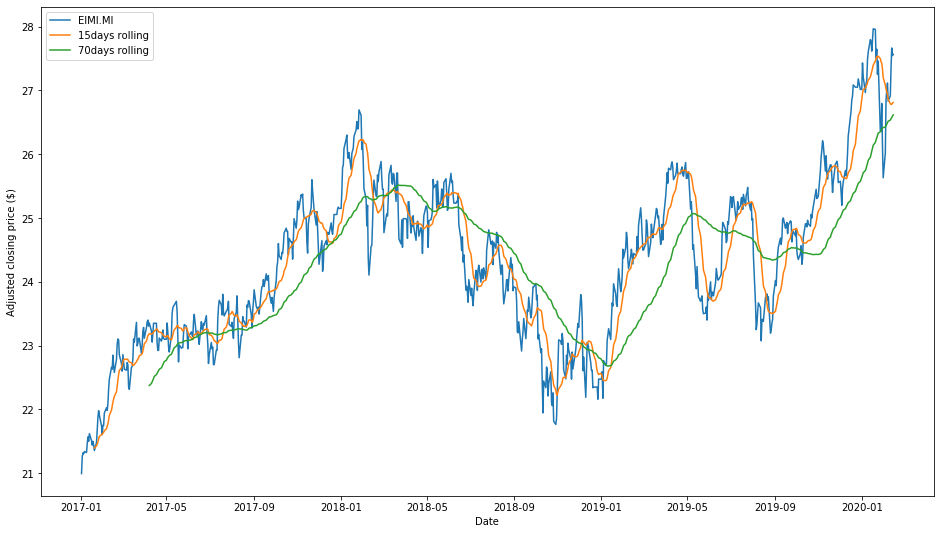

In [2]:

symbol = 'EIMI.MI'
s = 15
l = 70 

# Get the MSFT timeseries. This now returns a Pandas Series object indexed by date.
symboldata = close.loc[:, 'EIMI.MI']

# Calculate the 20 and 100 days moving averages of the closing prices
short_rolling = symboldata.rolling(window=s).mean()
long_rolling = symboldata.rolling(window=l).mean()

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(symboldata.index, symboldata, label=symbol)
ax.plot(short_rolling.index, short_rolling, label= str(s) + 'days rolling')
ax.plot(long_rolling.index, long_rolling, label=str(l) + 'days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

plt.show( ax )